# Desafio Bônus: 

Nos exercícios anteriores, criamos, manipulamos e populamos tabelas em nossa base de dados. Agora, com esses dados, podemos gerar insights e realizar análises interessantes. Como desafio bônus, responda às perguntas a seguir:

## Conexão e importação de dados

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
caminho_bd = '../data/bootcampDB.db'
conexao = sqlite3.connect(caminho_bd)

In [3]:
# Comando SQL
comando_sql = """
    SELECT com.id,
           com.produto,
           com.valor,
           com.cliente_id,
           cli.nome,
           cli.idade,
           cli.saldo,
           CASE
             WHEN cli.idade BETWEEN 1 AND 20 THEN '1 a 20'
             WHEN cli.idade BETWEEN 21 AND 40 THEN '21 a 40'
             WHEN cli.idade BETWEEN 41 AND 60 THEN '41 a 60'
             ELSE 'acima de 60'
           END AS faixa_etaria
    FROM   clientes cli
           JOIN compras com
             ON cli.id = com.cliente_id
    ORDER  BY cli.id,
              com.id  
"""

# Criação do dataframe
df = pd.read_sql_query(comando_sql, conexao)
df.head()

,id,produto,valor,cliente_id,nome,idade,saldo,faixa_etaria
0,22,Smartphone modelo X,500.0,1,João Silva,30,500.95,21 a 40
1,38,Laptop modelo Y,1800.0,1,João Silva,30,500.95,21 a 40
2,9,Laptop modelo Y,1800.0,2,Maria Oliveira,25,277.80,21 a 40
3,21,Smartwatch modelo Z,250.5,2,Maria Oliveira,25,277.80,21 a 40
4,4,Laptop modelo Y,1800.0,3,Pedro Santos,40,875.00,21 a 40


## Exercícios

### 01. 
**Quais são os produtos mais comprados em termos de quantidade?**

In [4]:
# Dataframe
produtos_por_quantidade = (
    df['produto'].value_counts().sort_values(ascending=False).nlargest(5)
)
produtos_por_quantidade

produto
Laptop modelo Y            17
Smartphone modelo X        11
Fone de ouvido modelo A     4
Smartwatch modelo Z         3
Tablet modelo B             3
Name: count, dtype: int64

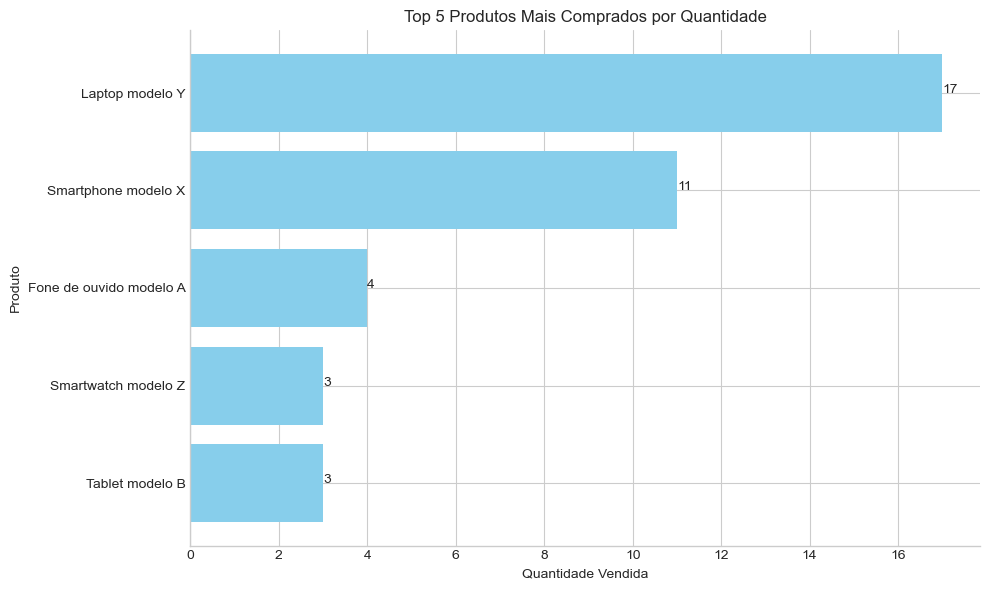

In [5]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criando a figura e definindo os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras horizontais
ax.barh(produtos_por_quantidade.index, produtos_por_quantidade.values, color='skyblue')

# Definindo título e rótulos
ax.set_title('Top 5 Produtos Mais Comprados por Quantidade')
ax.set_xlabel('Quantidade Vendida')
ax.set_ylabel('Produto')

# Adicionando rótulos nas barras
for index, value in enumerate(produtos_por_quantidade.values):
    ax.text(value, index, str(value))

# Removendo as spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invertendo o eixo Y para que o produto mais vendido fique no topo
ax.invert_yaxis()

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### 02. 
**Quais são os produtos que geraram a maior receita total em vendas?**

In [6]:
# Dataframe
produtos_por_receita = df.groupby('produto')['valor'].sum().sort_values(ascending=False).nlargest(5)
produtos_por_receita

produto
Laptop modelo Y        30600.0
Tablet modelo B        10500.0
Smartphone modelo X     5500.0
Smartphone modelo Z     1800.0
Smartwatch modelo Z      751.5
Name: valor, dtype: float64

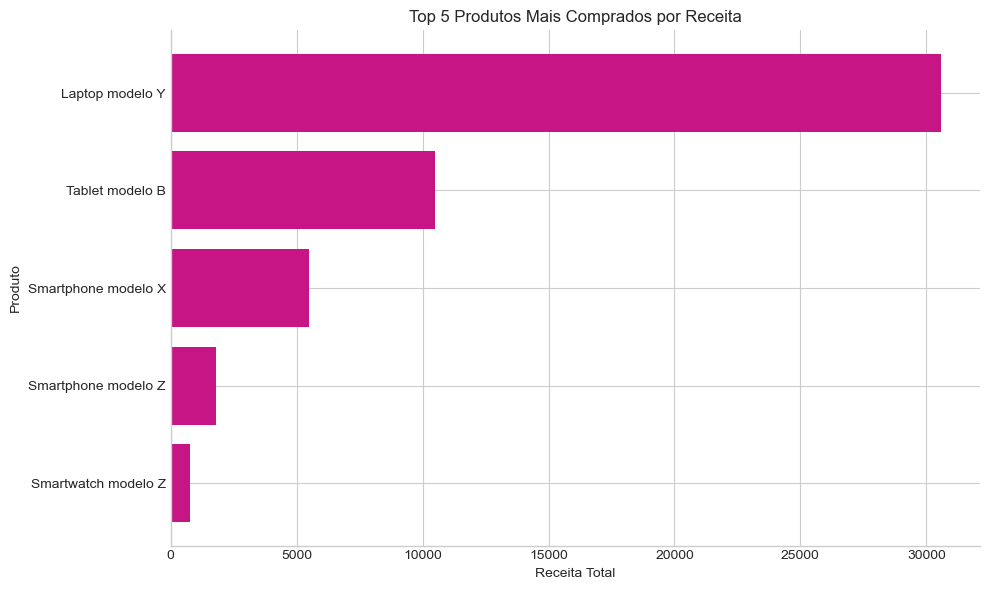

In [7]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criando a figura e definindo os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras horizontais
ax.barh(produtos_por_receita.index, produtos_por_receita.values, color='mediumvioletred')

# Definindo título e rótulos
ax.set_title('Top 5 Produtos Mais Comprados por Receita')
ax.set_xlabel('Receita Total')
ax.set_ylabel('Produto')

# Removendo as spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invertendo o eixo Y para que o produto mais vendido fique no topo
ax.invert_yaxis()

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### 03. 
**Qual a distribuição de saldo dos clientes?**

In [8]:
#  DataFrame
df.groupby('cliente_id')['saldo'].mean().sort_values()

cliente_id
12       98.00
2       277.80
13      440.15
1       500.95
3       875.00
8      1700.25
4      1800.25
10     2100.00
5      2200.50
14     2300.00
7      2500.75
9      2600.50
15     2900.75
6      3000.00
11     3200.75
16     3400.25
17     3600.50
19     3800.75
20     4000.25
21    12000.00
Name: saldo, dtype: float64

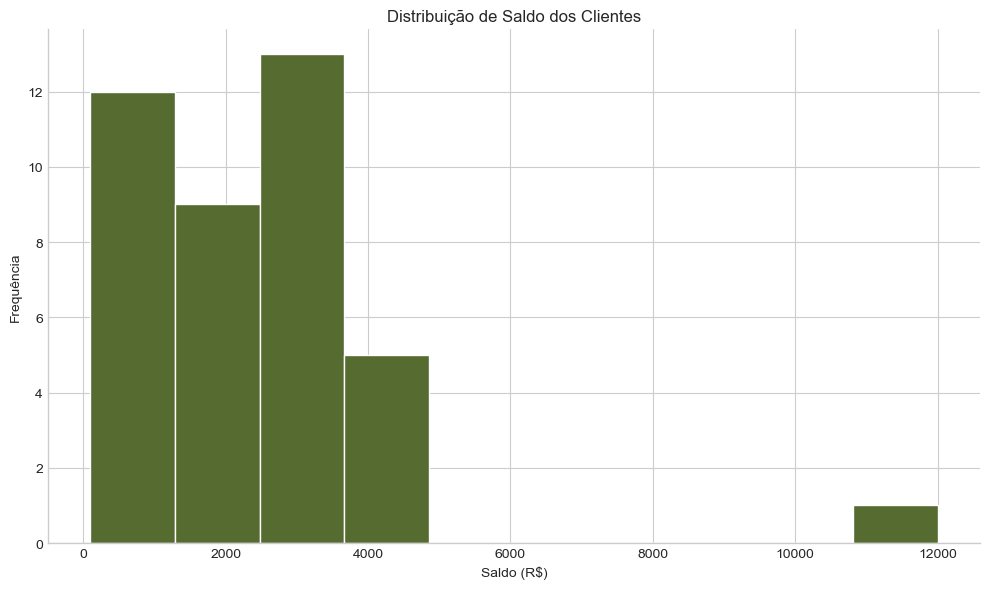

In [9]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criando a figura e definindo os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma
ax.hist(df['saldo'], color='darkolivegreen', edgecolor='white')

# Definindo título e rótulos
ax.set_title('Distribuição de Saldo dos Clientes')
ax.set_xlabel('Saldo (R$)')
ax.set_ylabel('Frequência')

# Removendo as spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### 04. 
**Qual é a distribuição percentual de clientes por faixa etária?**

In [10]:
# Dataframe
clientes_faixa_etaria = df['faixa_etaria'].value_counts().sort_index()
clientes_faixa_etaria

faixa_etaria
1 a 20          1
21 a 40        29
41 a 60         9
acima de 60     1
Name: count, dtype: int64

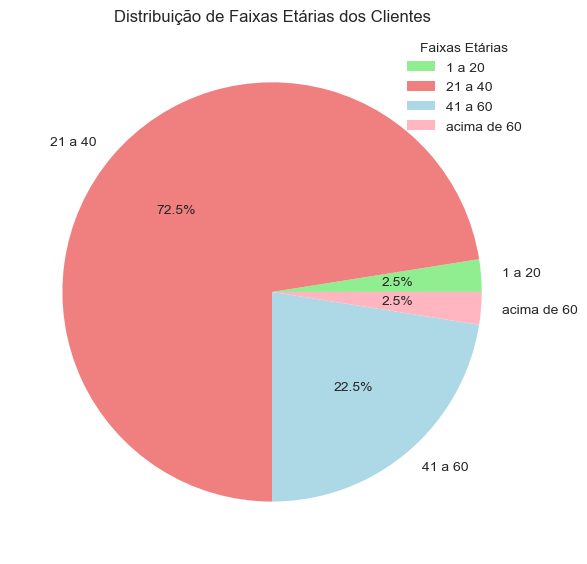

In [11]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')
cores = ['lightgreen', 'lightcoral', 'lightblue', 'lightpink']

# Criando a figura
plt.figure(figsize=(6, 6))

# Gráfico de Pizza
plt.pie(
    clientes_faixa_etaria,
    labels=clientes_faixa_etaria.index,
    autopct='%1.1f%%',
    colors=cores
)

# Definindo título e rótulos
plt.title('Distribuição de Faixas Etárias dos Clientes')
plt.legend(title='Faixas Etárias')

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### 05. 
**Qual a média de valores de compras por faixa etária dos clientes?**

In [12]:
# Dataframe
media_compras_por_faixa_etaria = (
    df.groupby('faixa_etaria')['valor'].mean().round(2).sort_index()
)
media_compras_por_faixa_etaria

faixa_etaria
1 a 20         1800.00
21 a 40        1205.22
41 a 60        1222.20
acima de 60    1800.00
Name: valor, dtype: float64

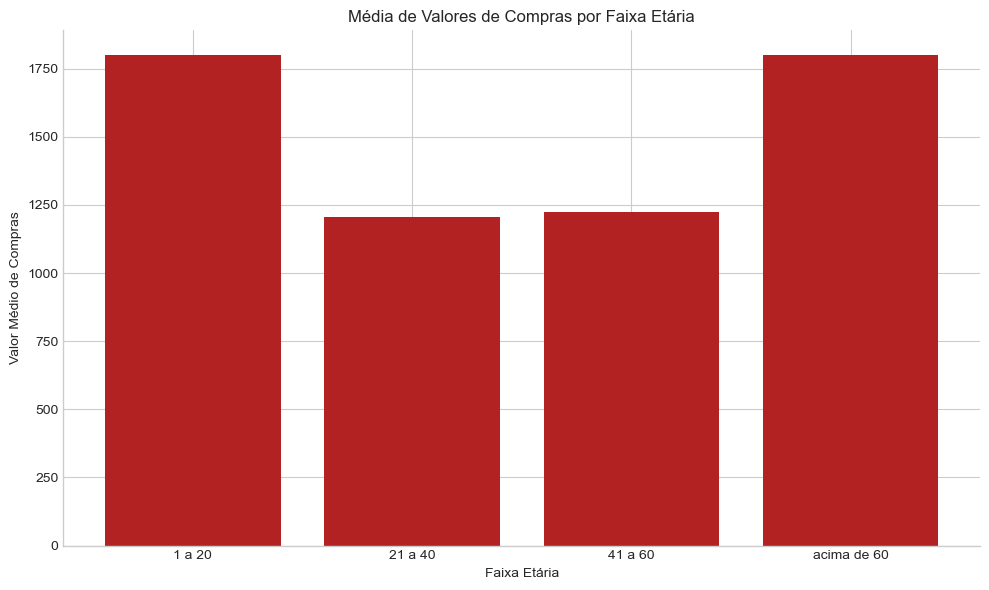

In [13]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criando a figura e definindo os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o gráfico de barras verticais
ax.bar(
    media_compras_por_faixa_etaria.index,
    media_compras_por_faixa_etaria.values,
    color='firebrick',
)

# Definindo título e rótulos
ax.set_title('Média de Valores de Compras por Faixa Etária')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Valor Médio de Compras')

# Removendo as spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

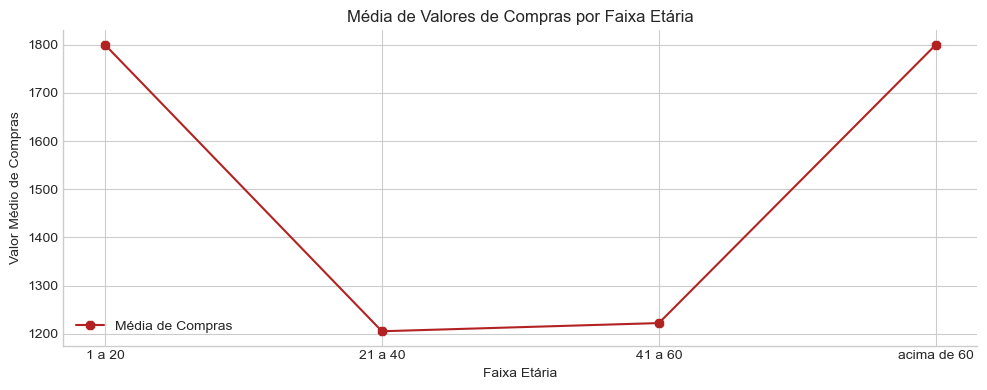

In [14]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criando a figura e definindo os eixos
fig, ax = plt.subplots(figsize=(10, 4))

# Gráfico de linhas
ax.plot(
    media_compras_por_faixa_etaria.index,
    media_compras_por_faixa_etaria.values,
    marker='8',
    linestyle='-',
    color='firebrick',
    label='Média de Compras',
)

# Definindo título e rótulos
ax.set_title('Média de Valores de Compras por Faixa Etária')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Valor Médio de Compras')

# Mostrando a legenda
plt.legend()

# Removendo as spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### 06. 
**Existe alguma relação entre a distribuição do saldo dos clientes e sua faixa etária?**


In [15]:
# Dataframe
media_saldo_por_faixa_etaria = df.groupby('faixa_etaria')['saldo'].mean()
media_saldo_por_faixa_etaria.sort_values()

faixa_etaria
21 a 40         1594.067241
1 a 20          3400.250000
41 a 60         3533.861111
acima de 60    12000.000000
Name: saldo, dtype: float64

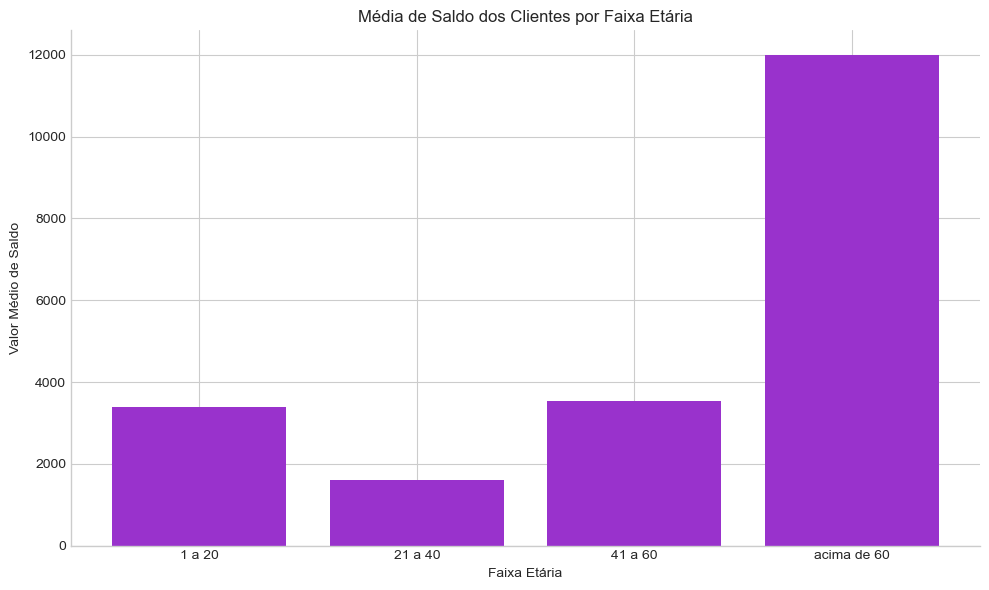

In [16]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criando a figura e definindo os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o gráfico de barras verticais
ax.bar(
    media_saldo_por_faixa_etaria.index,
    media_saldo_por_faixa_etaria.values,
    color='darkorchid',
)

# Definindo título e rótulos
ax.set_title('Média de Saldo dos Clientes por Faixa Etária')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Valor Médio de Saldo')

# Removendo as spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### 07. 
**Existe alguma relação entre a média de idade dos clientes com os produtos comprados?**

In [17]:
# Dataframe
media_idade_por_produto = df.groupby('produto')['idade'].mean()
media_idade_por_produto

produto
Fone de ouvido modelo A    37.750000
Laptop modelo Y            36.176471
Smartphone modelo X        35.090909
Smartphone modelo Z        40.000000
Smartwatch modelo Z        28.000000
Tablet modelo B            35.666667
Name: idade, dtype: float64

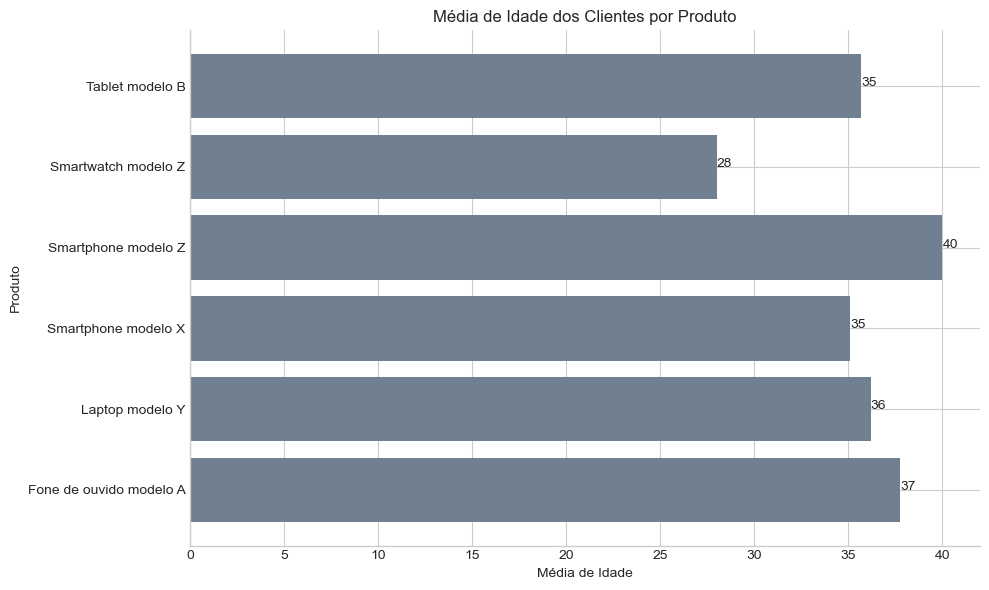

In [18]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Criando a figura e definindo os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras horizontais
ax.barh(media_idade_por_produto.index, media_idade_por_produto.values, color='slategray')

# Definindo título e rótulos
ax.set_title('Média de Idade dos Clientes por Produto')
ax.set_xlabel('Média de Idade')
ax.set_ylabel('Produto')

# Adicionando rótulos nas barras
for index, value in enumerate(media_idade_por_produto.values):
    ax.text(value, index, f'{int(value)}')

# Removendo as spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### 08. 
**Quais são os produtos mais populares em cada faixa etária?**

In [19]:
# Dataframe
produtos_populares = (
    df.groupby(['faixa_etaria', 'produto']).size().reset_index(name='quantidade')
)
produtos_populares.sort_values(by=['faixa_etaria', 'quantidade'], inplace=True)
produtos_populares

,faixa_etaria,produto,quantidade
0,1 a 20,Laptop modelo Y,1
4,21 a 40,Smartphone modelo Z,1
1,21 a 40,Fone de ouvido modelo A,2
6,21 a 40,Tablet modelo B,2
5,21 a 40,Smartwatch modelo Z,3
3,21 a 40,Smartphone modelo X,9
2,21 a 40,Laptop modelo Y,12
10,41 a 60,Smartphone modelo Z,1
11,41 a 60,Tablet modelo B,1
7,41 a 60,Fone de ouvido modelo A,2


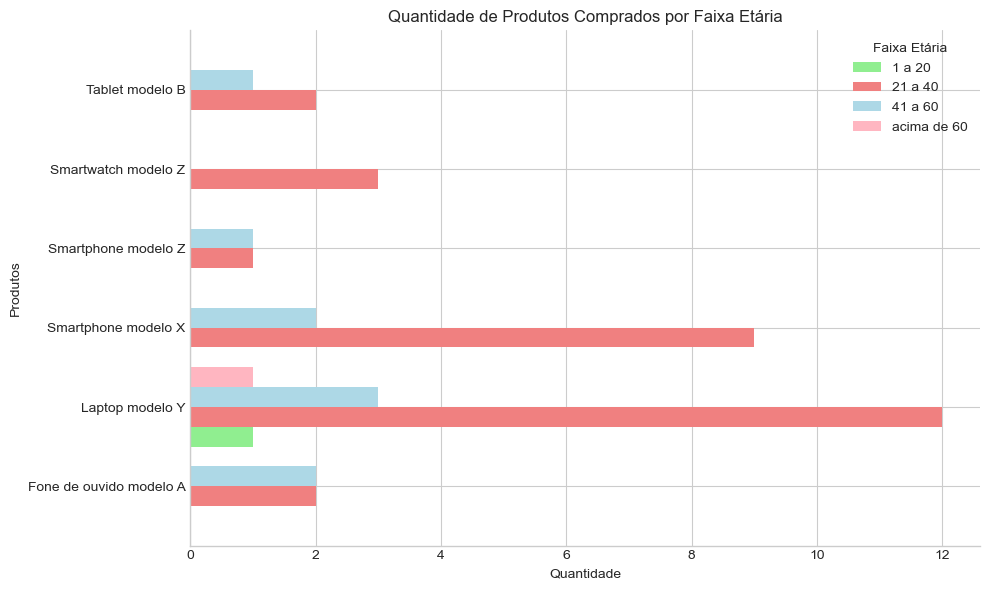

In [20]:
# Definindo o estilo
plt.style.use('seaborn-v0_8-whitegrid')
cores = ['lightgreen', 'lightcoral', 'lightblue', 'lightpink']

# Pivotando os dados para barras agrupadas
pivot = produtos_populares.pivot(index='produto', columns='faixa_etaria', values='quantidade')

# Criando a figura e definindo os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras agrupadas
pivot.plot(kind='barh', stacked=False, color=cores, ax=ax, width=1)

# Definindo título e rótulos
ax.set_ylabel('Produtos')
ax.set_xlabel('Quantidade')
ax.set_title('Quantidade de Produtos Comprados por Faixa Etária')

# Mostrando a legenda
ax.legend(title='Faixa Etária')

# Removendo as spines do topo e da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()